In [1]:
import os
import getpass
from typing import Annotated, Dict, List, Any
from typing_extensions import TypedDict

def setup_environment():
    """Setup your API Keys"""
    if not os.environ.get("OPENAI_API_KEY"):
        openai_key = getpass.getpass("Enter your OpenAI API Key: ")
        os.environ["OPENAI_API_KEY"] = openai_key
    if not os.environ.get("LANGSMITH_API_KEY"):
        langsmith_key = getpass.getpass("Enter your LangSmith API Key: ")
        if langsmith_key:
            os.environ["LANGSMITH_API_KEY"] = langsmith_key
            os.environ["LANGCHAIN_TRACING_V2"] = "true"
            os.environ["LANGCHAIN_PROJECT"] = "LangGraph Basic"
        else:
            print("LangSmith API Key not provided. Tracing will not be enabled.")
            
    print("Enviroment setup completed.")

setup_environment()


Enviroment setup completed.


In [2]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage

class State(TypedDict):
    # messages will store our converstaion history
    # add_messages is a special function that appends new message instead of replacing them
    messages: Annotated[list, add_messages]

In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(
    model = "gpt-4o",
    temperature = 0.7
)
llm.invoke("Hi").content

'Hello! How can I assist you today?'

In [4]:
def chatbot_node(state: State) -> Dict[str, Any]:
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [5]:
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot_node)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

simple_chatbot = graph_builder.compile()

In [6]:
initial_state = {
    "messages": [HumanMessage(content="Hello! My name is Manmath. What is your name?")]
}

result = simple_chatbot.invoke(initial_state)

In [7]:
result['messages']

[HumanMessage(content='Hello! My name is Manmath. What is your name?', additional_kwargs={}, response_metadata={}, id='2e0d337d-c10a-4c08-81fa-b921a5629a3f'),
 AIMessage(content="Hello Manmath! I'm ChatGPT, an AI language model created by OpenAI. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 20, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ff25b2783a', 'id': 'chatcmpl-C72g6ybFxhzDYy5nO7AHQVPsPKYkC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d543e38f-eb50-4108-af38-8799f8e61f80-0', usage_metadata={'input_tokens': 20, 'output_tokens': 24, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'outp

In [8]:
for i, message in enumerate(result['messages']):
    if isinstance(message, HumanMessage):
        print(f"User: {message.content}")
    if isinstance(message, AIMessage):
        print(f"AI: {message.content}")

User: Hello! My name is Manmath. What is your name?
AI: Hello Manmath! I'm ChatGPT, an AI language model created by OpenAI. How can I assist you today?


In [9]:
def test_simple_chatbot(user_input):
    initial_state = {
        "messages": [HumanMessage(content=user_input)]
    }
    result = simple_chatbot.invoke(initial_state)
    for i, message in enumerate(result['messages']):
        if isinstance(message, HumanMessage):
            print(f"User: {message.content}")
        if isinstance(message, AIMessage):
            print(f"AI: {message.content}")
    return result

In [10]:
test_simple_chatbot("Who was the war secretary of the US under Abraham Lincoln?")

User: Who was the war secretary of the US under Abraham Lincoln?
AI: The Secretary of War under President Abraham Lincoln was Edwin M. Stanton. He served in this position from 1862 to 1868, playing a crucial role during the American Civil War. Prior to Stanton, Simon Cameron held the position from 1861 to 1862.


{'messages': [HumanMessage(content='Who was the war secretary of the US under Abraham Lincoln?', additional_kwargs={}, response_metadata={}, id='5900592c-1017-4f4a-a468-703bf5f009f4'),
  AIMessage(content='The Secretary of War under President Abraham Lincoln was Edwin M. Stanton. He served in this position from 1862 to 1868, playing a crucial role during the American Civil War. Prior to Stanton, Simon Cameron held the position from 1861 to 1862.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 19, 'total_tokens': 75, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_ea40d5097a', 'id': 'chatcmpl-C72g9DRlhNC06pCNow7iO4HxAQHoN', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--13

In [11]:
test_simple_chatbot("What was my last question?")

User: What was my last question?
AI: I'm sorry, but I can't recall past interactions or questions. Could you please repeat your question?


{'messages': [HumanMessage(content='What was my last question?', additional_kwargs={}, response_metadata={}, id='3c846ecf-4224-4242-ae5a-e5538106aa8c'),
  AIMessage(content="I'm sorry, but I can't recall past interactions or questions. Could you please repeat your question?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 13, 'total_tokens': 32, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-C72gDrhrkbAhoSkzoLwDHdGrLxus2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--6e59b4c8-5307-454e-888b-ac1b02e636f6-0', usage_metadata={'input_tokens': 13, 'output_tokens': 19, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'outp

In [12]:
%pip install langgraph-checkpoint-sqlite

Note: you may need to restart the kernel to use updated packages.


In [13]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

### CREATING CHATBOT WITH MEMORY

In [14]:
graph_builder_with_memory = StateGraph(State)
graph_builder_with_memory.add_node("chatbot", chatbot_node)
graph_builder_with_memory.add_edge(START, "chatbot")
graph_builder_with_memory.add_edge("chatbot", END)

chatbot_with_memory = graph_builder_with_memory.compile(checkpointer=memory)


In [15]:
import uuid
unique_id = uuid.uuid4()
print(f"Unique ID: {unique_id}")

Unique ID: 2e6c54a7-2a73-4db6-b49c-a880c8208da6


In [16]:
def test_simple_chatbot_with_memory(user_input):
    config = {"configurable": {"thread_id": str(unique_id)}}
    initial_state = {
        "messages": [HumanMessage(content=user_input)]
    }
    result = chatbot_with_memory.invoke(initial_state, config)
    return result

In [17]:
test_simple_chatbot_with_memory("Hi My name is Manmath, I aspire to be an AI Engineer")

{'messages': [HumanMessage(content='Hi My name is Manmath, I aspire to be an AI Engineer', additional_kwargs={}, response_metadata={}, id='f42ee763-0a66-49fe-a253-9dafba488433'),
  AIMessage(content="Hello Manmath! That's a great aspiration. AI engineering is an exciting and rapidly evolving field. Here are a few steps you might consider on your journey to becoming an AI engineer:\n\n1. **Educational Foundation**: \n   - **Mathematics**: Ensure you have a strong understanding of linear algebra, calculus, probability, and statistics.\n   - **Computer Science**: Gain proficiency in programming languages like Python, which is widely used in AI for its libraries and frameworks.\n   - **Machine Learning**: Study machine learning concepts and algorithms. Online courses from platforms like Coursera, edX, or Udacity can be very helpful.\n\n2. **Practical Experience**: \n   - Work on projects that involve data analysis, machine learning, and artificial intelligence.\n   - Participate in competi

In [18]:
test_simple_chatbot_with_memory("What is my name?")

{'messages': [HumanMessage(content='Hi My name is Manmath, I aspire to be an AI Engineer', additional_kwargs={}, response_metadata={}, id='f42ee763-0a66-49fe-a253-9dafba488433'),
  AIMessage(content="Hello Manmath! That's a great aspiration. AI engineering is an exciting and rapidly evolving field. Here are a few steps you might consider on your journey to becoming an AI engineer:\n\n1. **Educational Foundation**: \n   - **Mathematics**: Ensure you have a strong understanding of linear algebra, calculus, probability, and statistics.\n   - **Computer Science**: Gain proficiency in programming languages like Python, which is widely used in AI for its libraries and frameworks.\n   - **Machine Learning**: Study machine learning concepts and algorithms. Online courses from platforms like Coursera, edX, or Udacity can be very helpful.\n\n2. **Practical Experience**: \n   - Work on projects that involve data analysis, machine learning, and artificial intelligence.\n   - Participate in competi

In [19]:
test_simple_chatbot_with_memory("What was my last question?")

{'messages': [HumanMessage(content='Hi My name is Manmath, I aspire to be an AI Engineer', additional_kwargs={}, response_metadata={}, id='f42ee763-0a66-49fe-a253-9dafba488433'),
  AIMessage(content="Hello Manmath! That's a great aspiration. AI engineering is an exciting and rapidly evolving field. Here are a few steps you might consider on your journey to becoming an AI engineer:\n\n1. **Educational Foundation**: \n   - **Mathematics**: Ensure you have a strong understanding of linear algebra, calculus, probability, and statistics.\n   - **Computer Science**: Gain proficiency in programming languages like Python, which is widely used in AI for its libraries and frameworks.\n   - **Machine Learning**: Study machine learning concepts and algorithms. Online courses from platforms like Coursera, edX, or Udacity can be very helpful.\n\n2. **Practical Experience**: \n   - Work on projects that involve data analysis, machine learning, and artificial intelligence.\n   - Participate in competi

### TOOL INTEGRATION

Real AI agents need to interact with the outside world! Let's add the tool calling capabilities

### WHAT ARE TOOLS 

- search the web
- Query Database
- send email
- perform calculations
- Access APIs

In [20]:
import math

In [34]:
from langchain_core.tools import tool

@tool
def calculator(expression: str) -> str:
    """
    Evaluate a mathematical expression safely.
    
    Args:
        expression: A mathematical expression to evaluate (e.g., "2 + 3 * 4")
        
    Returns:
        The result of the calculation
    """
    try:
        # Safe evaluation of mathematical expressions
        # Only allow basic math operations
        allowed_names = {
            k: v for k, v in math.__dict__.items() if not k.startswith("__")
        }
        allowed_names.update({"abs": abs, "round": round})
        
        result = eval(expression, {"__builtins__": {}}, allowed_names)
        return f"The result of {expression} is {result}"
    except Exception as e:
        return f"Error calculating {expression}: {str(e)}"
    
@tool  
def get_current_time() -> str:
    """Get the current time."""
    from datetime import datetime
    return f"Current time is: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"


In [35]:
calculator("sqrt(16)")

'The result of sqrt(16) is 4.0'

In [36]:
get_current_time("")

'Current time is: 2025-08-21 22:22:23'

In [37]:
from langgraph.prebuilt import ToolNode
from langchain_core.messages import ToolMessage

tools = [calculator, get_current_time]
llm_with_tools = llm.bind_tools(tools)
llm_with_tools.invoke("sqrt(16)")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_blBCMwJHynPTd1X6KveLt0uX', 'function': {'arguments': '{"expression":"sqrt(16)"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 91, 'total_tokens': 108, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-C72oUjx0H7Yep0CZIrKXhVbebAgVk', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e4c5d3d9-46ca-4a43-ab36-d364ade8d0a0-0', tool_calls=[{'name': 'calculator', 'args': {'expression': 'sqrt(16)'}, 'id': 'call_blBCMwJHynPTd1X6KveLt0uX', 'type': 'tool_call'}], usage_metadata={'input_tokens': 91, 'output_tokens': 17, 'total_tokens': 108, 'input_token_detai

In [38]:
llm_with_tools.invoke("What is the current time?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_etii8C8W9jAkGuDVUjaZPsCA', 'function': {'arguments': '{}', 'name': 'get_current_time'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 93, 'total_tokens': 104, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-C72rhqkup2NUt7t7MlDprJq28jhaX', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8cc62208-7a71-4e1e-b53b-826f07d079b0-0', tool_calls=[{'name': 'get_current_time', 'args': {}, 'id': 'call_etii8C8W9jAkGuDVUjaZPsCA', 'type': 'tool_call'}], usage_metadata={'input_tokens': 93, 'output_tokens': 11, 'total_tokens': 104, 'input_token_details': {'audio': 0, 'cache_read': 0},

In [39]:
llm_with_tools.invoke("Who is the PM of India?")

AIMessage(content='As of October 2023, the Prime Minister of India is Narendra Modi.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 94, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-C72sMs7Q5WLh4cu2T3ocUEpEZCkxb', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--cadbb56b-1bf5-4eb2-9099-9103174a8343-0', usage_metadata={'input_tokens': 94, 'output_tokens': 17, 'total_tokens': 111, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [40]:
from langgraph.prebuilt import ToolNode
from langchain_core.messages import ToolMessage

tools = [calculator, get_current_time]
llm_with_tools = llm.bind_tools(tools)


def chatbot_with_tools(state: State) -> Dict[str, Any]:
    messages = state['messages']
    response = llm_with_tools.invoke(messages)
    return {"messages": [response]}



tool_node = ToolNode(tools)

In [42]:
from typing import Literal

def should_continue(state: State) -> Literal["tools", "__end__"]:
    """
    Determine wether to continue with tools or end the conversation

    Returns:
        "tools" if the last message has tool calls
        "__end__" if we should end the conversation
    """
    last_message = state['messages'][-1]
    if hasattr(last_message, "tool_calls") and last_message.tool_calls:
        return "tools"
    else:
        return "__end__"

In [43]:
dict_var = llm_with_tools.invoke("2+2")
hasattr(dict_var, "tool_calls")

True

In [44]:
dict_var = llm_with_tools.invoke("current time")
hasattr(dict_var, "tool_calls")

True

In [45]:
dict_var = llm_with_tools.invoke("Who is the PM of India?")
hasattr(dict_var, "tool_calls")

True

In [53]:
tools_graph_builder = StateGraph(State)
tools_graph_builder.add_node("chatbot", chatbot_with_tools)
tools_graph_builder.add_node("tools", tool_node)

tools_graph_builder.add_edge(START, "chatbot")
tools_graph_builder.add_conditional_edges(
    "chatbot",
    should_continue,
    {
       "tools": "tools",
       "__end__" : END
    }
)
tools_graph_builder.add_edge("tools", END)
tool_chatbot = tools_graph_builder.compile(checkpointer=memory)

In [54]:
import uuid
unique_id = uuid.uuid4()
print(f"Unique ID: {unique_id}")

Unique ID: 2c33d51d-d44b-4632-87c4-10f40a463cb4


In [55]:
def test_simple_chatbot_with_memory(user_input):
    config = {"configurable": {"thread_id": str(unique_id)}}
    initial_state = {
        "messages": [HumanMessage(content=user_input)]
    }
    result = tool_chatbot.invoke(initial_state, config)
    return result

In [56]:
test_simple_chatbot_with_memory("2+2")

{'messages': [HumanMessage(content='2+2', additional_kwargs={}, response_metadata={}, id='a82abf57-4b0e-46b4-90e1-2bab632458b3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zIwaw295eWSWrgcAkWxPqItv', 'function': {'arguments': '{"expression":"2+2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 90, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C73RP4z9BVir3N1Dpw2nQXzK37yXE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a250334-d7cc-493d-9364-28c1449cd2ea-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '2+2'}, 'id': 'call_zIwaw295eWSWrgcAkWxPqItv

In [57]:
test_simple_chatbot_with_memory("What is the current time?")

{'messages': [HumanMessage(content='2+2', additional_kwargs={}, response_metadata={}, id='a82abf57-4b0e-46b4-90e1-2bab632458b3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zIwaw295eWSWrgcAkWxPqItv', 'function': {'arguments': '{"expression":"2+2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 90, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C73RP4z9BVir3N1Dpw2nQXzK37yXE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a250334-d7cc-493d-9364-28c1449cd2ea-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '2+2'}, 'id': 'call_zIwaw295eWSWrgcAkWxPqItv

In [58]:
test_simple_chatbot_with_memory("Hi My name is Manmath, I aspire to be an AI Engineer")

{'messages': [HumanMessage(content='2+2', additional_kwargs={}, response_metadata={}, id='a82abf57-4b0e-46b4-90e1-2bab632458b3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zIwaw295eWSWrgcAkWxPqItv', 'function': {'arguments': '{"expression":"2+2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 90, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C73RP4z9BVir3N1Dpw2nQXzK37yXE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a250334-d7cc-493d-9364-28c1449cd2ea-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '2+2'}, 'id': 'call_zIwaw295eWSWrgcAkWxPqItv

In [59]:
test_simple_chatbot_with_memory("What was my second last question?")

{'messages': [HumanMessage(content='2+2', additional_kwargs={}, response_metadata={}, id='a82abf57-4b0e-46b4-90e1-2bab632458b3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zIwaw295eWSWrgcAkWxPqItv', 'function': {'arguments': '{"expression":"2+2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 90, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C73RP4z9BVir3N1Dpw2nQXzK37yXE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a250334-d7cc-493d-9364-28c1449cd2ea-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '2+2'}, 'id': 'call_zIwaw295eWSWrgcAkWxPqItv

In [60]:
test_simple_chatbot_with_memory("What was my first question?")

{'messages': [HumanMessage(content='2+2', additional_kwargs={}, response_metadata={}, id='a82abf57-4b0e-46b4-90e1-2bab632458b3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zIwaw295eWSWrgcAkWxPqItv', 'function': {'arguments': '{"expression":"2+2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 90, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_80956533cb', 'id': 'chatcmpl-C73RP4z9BVir3N1Dpw2nQXzK37yXE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a250334-d7cc-493d-9364-28c1449cd2ea-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '2+2'}, 'id': 'call_zIwaw295eWSWrgcAkWxPqItv

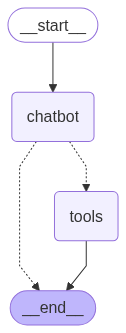

In [61]:
from IPython.display import Image, display

try:
    display(Image(tool_chatbot.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [75]:
import uuid
unique_id = uuid.uuid4()
print(f"unique ID:- {unique_id}")

unique ID:- 052bdcf5-5e0e-45da-990c-1d73eaa9af46


In [76]:
def test_tool_chatbot(user_message):
    print("🛠️ Testing Tool-Enabled Chatbot")
    print("=" * 50)
    
    config = {"configurable": {"thread_id": "tool_test_1"}}
    
    print(f"User Message: {user_message}")
    result1 = tool_chatbot.invoke(
        {"messages": [HumanMessage(content=user_message)]},
        config
    )
    
    for message in result1["messages"]:
        if isinstance(message, HumanMessage):
            print(f"👤 Human: {message.content}")
        elif isinstance(message, AIMessage):
            if hasattr(message, 'tool_calls') and message.tool_calls:
                print(f"🤖 AI: [Calling tool: {message.tool_calls[0]['name']}]")
            else:
                print(f"🤖 AI: {message.content}")
        elif isinstance(message, ToolMessage):
            print(f"🔧 Tool: {message.content}")

In [77]:
test_tool_chatbot("What is the capital of France?")

🛠️ Testing Tool-Enabled Chatbot
User Message: What is the capital of France?
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:21:07
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.
👤 Human: What was my second question?
🤖 AI: Your second question was: "What is the time?"
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:23:05
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.
👤 Human: What was my second question?
🤖 AI: Your second question was: "What is the time

In [71]:
test_tool_chatbot("What is the time?")

🛠️ Testing Tool-Enabled Chatbot
User Message: What is the time?
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:21:07
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.
👤 Human: What was my second question?
🤖 AI: Your second question was: "What is the time?"
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:23:05


In [72]:
test_tool_chatbot("2 + 3 * 4")

🛠️ Testing Tool-Enabled Chatbot
User Message: 2 + 3 * 4
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:21:07
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.
👤 Human: What was my second question?
🤖 AI: Your second question was: "What is the time?"
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:23:05
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14


In [73]:
test_tool_chatbot("Who is the CEO of OpenAI?")

🛠️ Testing Tool-Enabled Chatbot
User Message: Who is the CEO of OpenAI?
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:21:07
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.
👤 Human: What was my second question?
🤖 AI: Your second question was: "What is the time?"
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:23:05
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.


In [74]:
test_tool_chatbot("What was my second question?")

🛠️ Testing Tool-Enabled Chatbot
User Message: What was my second question?
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:21:07
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.
👤 Human: What was my second question?
🤖 AI: Your second question was: "What is the time?"
👤 Human: What is the capital of France?
🤖 AI: The capital of France is Paris.
👤 Human: What is the time?
🤖 AI: [Calling tool: get_current_time]
🔧 Tool: Current time is: 2025-08-21 23:23:05
👤 Human: 2 + 3 * 4
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 2 + 3 * 4 is 14
👤 Human: Who is the CEO of OpenAI?
🤖 AI: As of October 2023, the CEO of OpenAI is Sam Altman.
👤 Human: What was my second question?
🤖 AI: Your second question was: "What is the time?"

### Human in loop

Sometimes AI Agents need Human Oversight or approval before actions.

### What are the Interupts
- Review what the agent plan to do
- Modify the state if needed 
- Approve or reject action
- Provide additional guidance

In [78]:
class HumanLoopState(TypedDict):
    messages: Annotated[list, add_messages]
    human_approval: bool

In [86]:
@tool
def request_human_help(question: str) -> str:
    """
    Request help from human Supervision.

    Args:
        questions: The question that needs human assistance.
    Returns:
        Confirmation that help was requested.
    """
    return f"Human Help requested for: {question}"

human_tools = [calculator, get_current_time, request_human_help]
llm_with_human_tools = llm.bind_tools(human_tools)

### Create a node with Human assistance logic

In [87]:
def chatbot_with_human_help(state: HumanLoopState) -> Dict[str, Any]:
    messages = state["messages"]
    response = llm_with_human_tools.invoke(messages)
    ask_human = False
    if hasattr(response, "tool_calls"):
        for tool_call in response.tool_calls:
            if tool_call['name'] == 'request_human_help':
                ask_human = True
    return {"messages": [response], "ask_human": ask_human}



def human_node(state: HumanLoopState) -> Dict[str, Any]:
    """
    Human intervention node- this is where human can provide input
    """
    last_message = state['messages'][-1]
    if hasattr(last_message, "tool_calls") and last_message.tool_calls:
        tool_call = last_message.tool_calls[0]
        if tool_call['name'] ==  "request_human_help":
            human_response = "I'have reviewed your question, Please process with calculation and provide a detail Explanation"
            tool_message = ToolMessage(
                content = human_response, 
                tool_call_id = tool_call['id']

            )
            return {"messages": [tool_message],
                    "ask_human": False}

    return {"ask_human": False}

In [88]:
def route_human_loop(state: HumanLoopState) -> Literal["human", "tools", "__end__"]:
    """
    Route based on whether human help needed or tool cshould be called

    """
    if state.get("ask_human", False):
        return "human"

    messages = state['messages']
    last_message = messages[-1]

    if hasattr(last_message, "tool_calls"):
        for tool_call in last_message.tool_calls:
            if tool_call["name"] != "request_human_help":
                return "tools"
        return "human" 

    else:
        return "__end__"

In [89]:
human_loop_builder = StateGraph(HumanLoopState)
human_loop_builder.add_node("chatbot", chatbot_with_human_help)
human_loop_builder.add_node("tools", ToolNode(human_tools))
human_loop_builder.add_node("human", human_node)

human_loop_builder.add_edge(START, "chatbot")
human_loop_builder.add_conditional_edges(
    "chatbot",
    route_human_loop,
    {
        "human": "human",
        "tools": "tools",
        "__end__": END
    }
)
human_loop_builder.add_edge("human", END)
human_loop_builder.add_edge("tools", END)
human_loop_chatbot = human_loop_builder.compile(
    checkpointer=memory,
    interrupt_before=["human"]
)



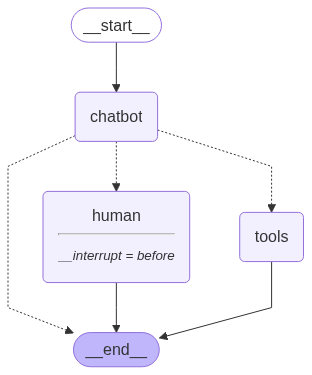

In [90]:
from IPython.display import Image, display

try:
    display(Image(human_loop_chatbot.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [ ]:
def test_human_loop(user_message):
    print("🛠️ Testing Tool-Enabled Chatbot")
    print("=" * 50)
    
    config = {"configurable": {"thread_id": "human_loop_test"}}

    initial_result = human_loop_chatbot.invoke(
        {"messages": [HumanMessage(content=user_message)]},
        config
    )
    for message in initial_result['messages']:
        if isinstance(message, HumanMessage):
            print(f"Human: {message.content}")
        elif isinstance(message, AIMessage):
            if hasattr(message, 'tool_calls') and message.tool_calls:
                print(f"AI: [Calling tool: {message.tool_calls[0]['name']}]")
            else:
                print(f"AI: {message.content}")